# Portfolio Management. Formulas CFA

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import random

jtplot.style(figsize=(15, 9))

In [3]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META', 'AVGO', 'TER']
amounts  = [20, 10, 30, 10, 2, 5]
weights = [i / sum(amounts) for i in amounts]
returns = [f'{t}_returns' for t in tickers]

In [4]:
df = yf.download(tickers, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  6 of 6 completed


Close                                                \
                  AMD       AMZN        AVGO        BAC        META   
Date                                                                  
2023-01-03  64.019997  85.820000  537.162781  32.075714  124.484192   
2023-01-04  64.660004  85.139999  543.723511  32.678753  127.108803   
2023-01-05  62.330002  83.120003  538.657349  32.611744  126.679680   
2023-01-06  63.959999  86.080002  571.082397  32.937191  129.753372   
2023-01-09  67.239998  87.360001  559.882751  32.439449  129.204498   

                            High                                    ...  \
                  TER        AMD       AMZN        AVGO        BAC  ...   
Date                                                                ...   
2023-01-03  85.381950  66.879997  86.959999  550.837418  32.630891  ...   
2023-01-04  86.862457  65.790001  86.980003  551.410004  33.329648  ...   
2023-01-05  86.564362  64.349998  85.419998  543.335256  32.678748  ...   
2023-01-06  90.658081  64.300003  86.400002  573.576638  33.099917  ...   
2023-01-09  92.615524  69.320000  89.480003  583.932183  33.272211  ...   

                  Open                                      Volume            \
                  AVGO        BAC        META        TER       AMD      AMZN   
Date                                                                           
2023-01-03  548.343177  31.807700  122.568131  88.283325  46851800  76706000   
2023-01-04  546.392438  32.449027  127.118777  86.683605  47477100  68885100   
2023-01-05  539.327009  32.468163  125.871336  86.286141  46159500  67930800   
2023-01-06  546.518568  32.630888  128.705522  87.716960  70161300  83303400   
2023-01-09  574.838424  33.262640  130.891035  92.347250  69741300  65266100   

                                                  
               AVGO       BAC      META      TER  
Date                                              
2023-01-03  2017300  35221500  35528500  1033200  
2023-01-04  1707400  41998500  32397100  2025400  
2023-01-05  1627700  34177000  25447100   998700  
2023-01-06  3526100  34068700  27584500  1444500  
2023-01-09  3773900  43818800  26649100  1654500  

[5 rows x 30 columns]

In [5]:
portfolio = pd.DataFrame(index=df.index, columns=tickers, data=0)
portfolio.head()

,AMD,AMZN,BAC,META,AVGO,TER
Date,,,,,,
2023-01-03,0,0,0,0,0,0
2023-01-04,0,0,0,0,0,0
2023-01-05,0,0,0,0,0,0
2023-01-06,0,0,0,0,0,0
2023-01-09,0,0,0,0,0,0


In [6]:
for ticker, amount in zip(tickers, amounts):
    portfolio[ticker] = df['Close'][ticker] * amount
    portfolio[f'{ticker}_returns'] = np.log(portfolio[ticker].div(portfolio[ticker].shift(1)))

portfolio.dropna(axis=0, inplace=True)
portfolio.head()

,AMD,AMZN,BAC,META,AVGO,TER,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
Date,,,,,,,,,,,,
2023-01-04,1293.200073,851.399994,980.362587,1271.088028,1087.447021,434.312286,0.009947,-0.007955,0.018626,0.020865,0.012140,0.017191
2023-01-05,1246.600037,831.200027,978.352318,1266.796799,1077.314697,432.821808,-0.036700,-0.024012,-0.002053,-0.003382,-0.009361,-0.003438
2023-01-06,1279.199982,860.800018,988.115730,1297.533722,1142.164795,453.290405,0.025815,0.034992,0.009930,0.023974,0.058454,0.046207
2023-01-09,1344.799957,873.600006,973.183479,1292.044983,1119.765503,463.077621,0.050010,0.014760,-0.015227,-0.004239,-0.019806,0.021362
2023-01-10,1361.000061,898.700027,979.788208,1327.172699,1115.960815,470.877533,0.011974,0.028327,0.006764,0.026825,-0.003404,0.016703


In [7]:
rates = ['^GSPC', '^TNX']
rates_df = yf.download(rates, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
rates_df.head()

[*********************100%***********************]  2 of 2 completed


Close                High                 Low         \
                  ^GSPC   ^TNX        ^GSPC   ^TNX        ^GSPC   ^TNX   
Date                                                                     
2023-01-03  3824.139893  3.793  3878.459961  3.810  3794.330078  3.724   
2023-01-04  3852.969971  3.709  3873.159912  3.728  3815.770020  3.664   
2023-01-05  3808.100098  3.720  3839.739990  3.784  3802.419922  3.698   
2023-01-06  3895.080078  3.569  3906.189941  3.754  3809.560059  3.558   
2023-01-09  3892.090088  3.517  3950.570068  3.591  3890.419922  3.508   

                   Open             Volume       
                  ^GSPC   ^TNX       ^GSPC ^TNX  
Date                                             
2023-01-03  3853.290039  3.758  3959140000    0  
2023-01-04  3840.360107  3.677  4414080000    0  
2023-01-05  3839.739990  3.728  3893450000    0  
2023-01-06  3823.370117  3.746  3923560000    0  
2023-01-09  3910.820068  3.589  4311770000    0

In [8]:
rates_df = rates_df['Close']

In [9]:
rates_df['market_returns'] = np.log(rates_df['^GSPC'].div(rates_df['^GSPC'].shift(1)))
rates_df['risk_free_returns'] = np.log(rates_df['^TNX'].div(rates_df['^TNX'].shift(1)))

rates_df.dropna(inplace=True)
rates_df.head()

,^GSPC,^TNX,market_returns,risk_free_returns
Date,,,,
2023-01-04,3852.969971,3.709,0.007511,-0.022395
2023-01-05,3808.100098,3.720,-0.011714,0.002961
2023-01-06,3895.080078,3.569,0.022584,-0.041438
2023-01-09,3892.090088,3.517,-0.000768,-0.014677
2023-01-10,3919.250000,3.621,0.006954,0.029142


<AxesSubplot:xlabel='Date'>

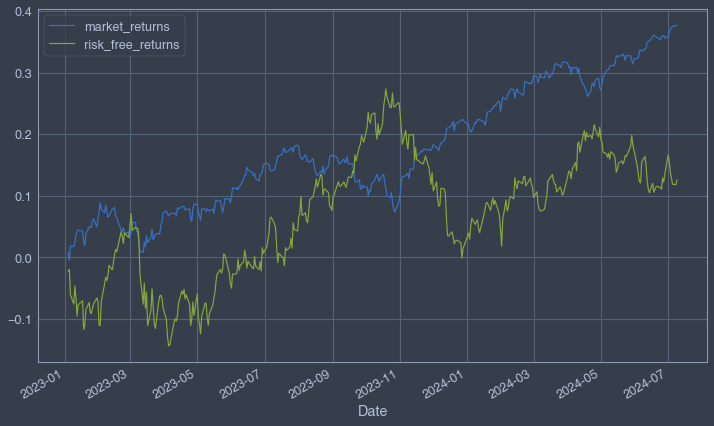

In [10]:
rates_df[['market_returns', 'risk_free_returns']].cumsum().plot()

In [12]:
rates_df[['market_returns', 'risk_free_returns']].sum()

market_returns       0.376573
risk_free_returns    0.118222
dtype: float64

In [11]:
risk_free_rate = rates_df['risk_free_returns'].sum()
market_rate = rates_df['market_returns'].sum()

market_var = np.var(rates_df['market_returns'])

## 1. Portfolio Management: an Overview

### Diversification Ratio

In [6]:
equally_weighted_portfolio = (df['Close'] * 1 / len(tickers)).sum(axis=1)
equally_weighted_portfolio_returns = np.log(equally_weighted_portfolio.div(equally_weighted_portfolio.shift(1)))[1:]

random_asset = df['Close'][random.choice(tickers)]
random_asset_returns = np.log(random_asset.div(random_asset.shift(1)))[1:]

diversification_ratio = equally_weighted_portfolio_returns.std() / random_asset_returns.std()
diversification_ratio

0.8122693930736987

In [10]:
diversification_ratio = portfolio[returns].sum(axis=1).std() / portfolio[random.choice(returns)].std()
diversification_ratio

4.812976810626439

### Net Asset Value per Share (NAVPS)

In [9]:
fund_assets = portfolio[tickers].iloc[-1].sum()
fund_liabilities = 0
number_of_shares_outstanding = sum(amounts)
NAV = fund_assets - fund_liabilities

net_asset_value_per_share = NAV / number_of_shares_outstanding
number_of_shares_outstanding

77

## 2. Portfolio Risk and Return: Part I

### Holding Period Return (HPR)

In [16]:
# No cash flows
beginning_value = portfolio.iloc[0][tickers].sum()
ending_value = portfolio.iloc[-1][tickers].sum()

HPR = (ending_value - beginning_value) / beginning_value
HPR

1.5316936072226048

In [47]:
# multiple periods
r_month_periods = portfolio[returns].resample('1M').sum().sum(axis=1)

HPR_multiple_periods = 1
for r in r_month_periods:
    HPR_multiple_periods *= (1 + r)

HPR_multiple_periods -= 1
HPR_multiple_periods

28.838162157358706

### Arithmetic mean return

In [43]:
portfolio[returns].resample('1M').sum()

,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
Date,,,,,,
2023-01-31,0.160291,0.183738,0.057125,0.177513,0.055403,0.168494
2023-02-28,0.044631,-0.090252,-0.033824,0.160698,0.015738,-0.004507
2023-03-31,0.220952,0.091802,-0.175274,0.191860,0.083676,0.061078
2023-04-30,-0.092284,0.020696,0.023498,0.125668,-0.023723,-0.162557
2023-05-31,0.279678,0.134077,-0.052229,0.096701,0.254364,0.093167
2023-06-30,-0.037054,0.077986,0.039820,0.080740,0.076336,0.105430
2023-07-31,0.004292,0.025149,0.109187,0.104524,0.035359,0.014358
2023-08-31,-0.078907,0.031877,-0.101586,-0.073949,0.026616,-0.044905
2023-09-30,-0.027814,-0.082195,-0.046038,0.014494,-0.099954,-0.071167


### Portfolio Return (Many risky assets)

<AxesSubplot:xlabel='Date'>

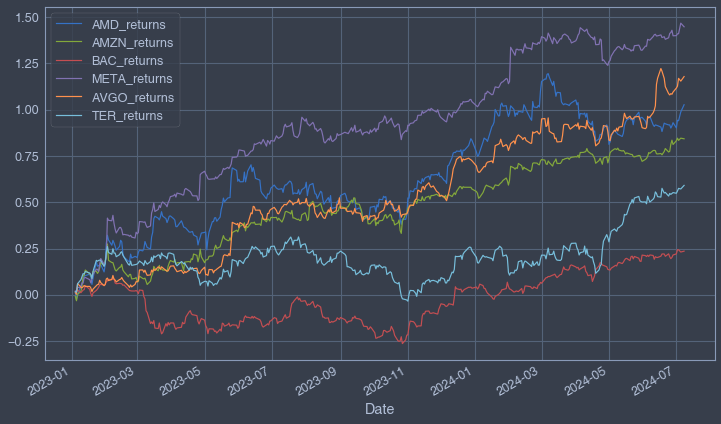

In [14]:
portfolio[returns].cumsum().plot()

In [15]:
portfolio_last_day_return = 0
portfolio_cumsum_return = 0
full_assets = sum(amounts)
for ticker, amount in zip(tickers, amounts):
    portfolio_last_day_return += portfolio.iloc[-1][ticker+'_returns'] * amount/full_assets
    portfolio_cumsum_return += portfolio.cumsum().iloc[-1][ticker+'_returns'] * amount/full_assets

portfolio_last_day_return, portfolio_cumsum_return

(0.010855303578006091, 0.7249069883246855)

### Portfolio Variance

In [16]:
d = []
returns_asset_pair = []
# [(r1, r2) for r1 in returns for r2 in returns if r1!=r2]
for r1 in returns:
    d.append(r1)
    for r2 in returns:
        if r1!=r2 and r2 not in d:
            returns_asset_pair.append((r1, r2))

returns_asset_pair

[('AMD_returns', 'AMZN_returns'),
 ('AMD_returns', 'BAC_returns'),
 ('AMD_returns', 'META_returns'),
 ('AMD_returns', 'AVGO_returns'),
 ('AMD_returns', 'TER_returns'),
 ('AMZN_returns', 'BAC_returns'),
 ('AMZN_returns', 'META_returns'),
 ('AMZN_returns', 'AVGO_returns'),
 ('AMZN_returns', 'TER_returns'),
 ('BAC_returns', 'META_returns'),
 ('BAC_returns', 'AVGO_returns'),
 ('BAC_returns', 'TER_returns'),
 ('META_returns', 'AVGO_returns'),
 ('META_returns', 'TER_returns'),
 ('AVGO_returns', 'TER_returns')]

In [17]:
t_weights = dict(zip(returns, weights))
t_weights

{'AMD_returns': 0.2597402597402597,
 'AMZN_returns': 0.12987012987012986,
 'BAC_returns': 0.38961038961038963,
 'META_returns': 0.12987012987012986,
 'AVGO_returns': 0.025974025974025976,
 'TER_returns': 0.06493506493506493}

In [18]:
portfolio_var = 0
for i, j in returns_asset_pair:
    portfolio_var += t_weights[i]*t_weights[j]*np.cov(portfolio[i], portfolio[j])[0][1]

portfolio_var

4.9654028074776e-05

### Covariance and Correlation

In [22]:
[(p, np.cov(portfolio[p[0]], portfolio[p[1]])[0][1]) for p in returns_asset_pair]

[(('AMD_returns', 'AMZN_returns'), 0.00025597240653950294),
 (('AMD_returns', 'BAC_returns'), 6.281262835596843e-05),
 (('AMD_returns', 'META_returns'), 0.00029418073364961524),
 (('AMD_returns', 'AVGO_returns'), 0.0003291522263572359),
 (('AMD_returns', 'TER_returns'), 0.00034948246389626507),
 (('AMZN_returns', 'BAC_returns'), 3.7003663684417785e-05),
 (('AMZN_returns', 'META_returns'), 0.000276968522875291),
 (('AMZN_returns', 'AVGO_returns'), 0.0001438656373486921),
 (('AMZN_returns', 'TER_returns'), 0.00014691640817001726),
 (('BAC_returns', 'META_returns'), 6.341008891510928e-05),
 (('BAC_returns', 'AVGO_returns'), 5.219021767749228e-05),
 (('BAC_returns', 'TER_returns'), 0.00010673902834238968),
 (('META_returns', 'AVGO_returns'), 0.00018271347587314922),
 (('META_returns', 'TER_returns'), 0.00013536373947960756),
 (('AVGO_returns', 'TER_returns'), 0.0002783273737499471)]

In [20]:
[(p, np.corrcoef(portfolio[p[0]], portfolio[p[1]])[0][1]) for p in returns_asset_pair]

[(('AMD_returns', 'AMZN_returns'), 0.450424847250475),
 (('AMD_returns', 'BAC_returns'), 0.13500266710321002),
 (('AMD_returns', 'META_returns'), 0.40579266228649125),
 (('AMD_returns', 'AVGO_returns'), 0.4970748004698721),
 (('AMD_returns', 'TER_returns'), 0.5526963973169605),
 (('AMZN_returns', 'BAC_returns'), 0.12338852031011371),
 (('AMZN_returns', 'META_returns'), 0.5927274315392614),
 (('AMZN_returns', 'AVGO_returns'), 0.3370673394435192),
 (('AMZN_returns', 'TER_returns'), 0.36046756766879245),
 (('BAC_returns', 'META_returns'), 0.16574833243018197),
 (('BAC_returns', 'AVGO_returns'), 0.1493533267627276),
 (('BAC_returns', 'TER_returns'), 0.3198787074408622),
 (('META_returns', 'AVGO_returns'), 0.33557604640361055),
 (('META_returns', 'TER_returns'), 0.2603508571880798),
 (('AVGO_returns', 'TER_returns'), 0.5860674170899156)]

In [ ]:
[np.corrcoef(portfolio[p[0]], portfolio[p[1]])[0][1] for p in returns_asset_pair]

### Beta

In [12]:
market_returns_var = np.var(rates_df['market_returns'])
market_returns_var

5.9506371808209664e-05

In [13]:
betas = [np.cov(portfolio[i], rates_df['market_returns'])[0][1] / market_returns_var for i in returns]
betas

[2.096799425260499,
 1.5353681313501224,
 1.0714096504988266,
 1.8226193975028446,
 1.70630209181392,
 1.802922447768201]

In [14]:
beta_portfolio = sum([beta*w for beta, w in zip(betas, weights)])
beta_portfolio

1.5595502562490038

### Capital Asset Pricing Model (CAPM)

In [19]:
capm = [risk_free_rate + beta*(market_rate - risk_free_rate) for ticker, beta in zip(tickers, betas)]

for ticker, c in zip(tickers, capm):
    print(ticker, c)

AMD 0.6533914844806448
AMZN 0.5120339072974733
BAC 0.39521810547436836
META 0.5843582388168864
AVGO 0.5550717834749699
TER 0.5793989265687303


### Capital Allocation Line

In [23]:
E_R_portfolio = risk_free_rate + (market_rate - risk_free_rate)*np.sqrt(portfolio_var)/np.sqrt(market_var)
E_R_portfolio

0.3539076349872403

### Sharpe Ratio

In [38]:
sharpe_ratio = (portfolio_cumsum_return - risk_free_rate)/np.sqrt(portfolio_var)
sharpe_ratio

84.31925875263002

### M<sup>2</sup> Ratio

In [22]:
M2_ratio = (portfolio_cumsum_return - risk_free_rate)\
           * (np.sqrt(market_var) / np.sqrt(portfolio_var))\
           - (market_rate - risk_free_rate)
M2_ratio

0.4066776453527968

### Treynor Ratio

In [27]:
treynor_ratio = (E_R_portfolio - risk_free_rate)/beta_portfolio
treynor_ratio

0.1511168125654945

In [30]:
treynor_ratio = (portfolio_cumsum_return - risk_free_rate)/beta_portfolio
treynor_ratio

0.38899438147160253

### Jensen’s Alpha

In [29]:
alpha_portfolio = portfolio_cumsum_return - (risk_free_rate + beta_portfolio*(market_rate - risk_free_rate))
alpha_portfolio

0.20375494999652333

## Formulas

### Portfolio: Risk&Return

---
#### *The* **population variance**
---

$\displaystyle
\sigma^2=\sum_{i=1}^N \frac{(x_i-\mu)^2}{N}
$
\begin{align*} \\ \end{align*}

---
#### *The* **sample variance**
---

$\displaystyle
s^2=\sum_{i=1}^n \frac{(x_i-\overline{x})^2}{(n-1)}
$
\begin{align*} \\ \end{align*}

---
#### *The* **covariance** *between two assets returns*
---

$\displaystyle
Cov_{1,2} = \frac{ \sum_{i=1}^n \{ (R_{i,1}-\overline{R_1})(R_{i,2}-\overline{R_2}) \} }{ (n-1) }
$
\begin{align*} \\ \end{align*}

---
#### *The* **correlation**
---

$\displaystyle
\rho_{1,2} = \frac {Cov_{1,2}} {\sigma_1 \sigma_2}
$
\begin{align*} \\ \end{align*}

---
#### **Time-weighted** *rate of return*
---
$\displaystyle
r_{TW}=[ (1+r_1)(1+r_2)\ldots(1+r_N)^\frac{1}{N} ] - 1
$
\begin{align*} \\ \end{align*}

---
#### **Annualized** *return*
---
$\displaystyle
r_{annual} = (1+r_{period})^c-1
$

- $c$ - number of periods in a year
\begin{align*} \\ \end{align*}

---
#### **Nominal** *rate of return*
---
$\displaystyle
(1+r)=(1+r_rF)(1+\pi)(1+RP)
$

- $r_rF$ - real risk-free rate of return
- $\pi$ - inflation
- $RP$ - risk premium
\begin{align*} \\ \end{align*}

---
#### **Real** *rate of return*
---
$\displaystyle
(1+r_{real})=(1+r_rF)(1+RP)=\frac{1+r}{1+\pi}
$

- $r_rF$ - real risk-free rate of return
- $\pi$ - inflation
- $RP$ - risk premium
\begin{align*} \\ \end{align*}

---
#### **Utility** *function*
---
$\displaystyle
U=E(r)-\frac{1}{2}A\sigma^2
$

- $U$ - utility of an investment
- $E(r)$ - expected return
- $A$ - risk aversion level
\begin{align*} \\ \end{align*}

---
#### *Portfolio* **return** (many risky assets)
---
$\displaystyle
R_p = \sum_{i=1}^N w_iR_i, \sum_{i=1}^Nw_i=1
$

- $R_i$ - return of asset
- $w_i$ - weight within the portfolio
\begin{align*} \\ \end{align*}
---
#### *Portfolio* **variance**
---
$\displaystyle
\sigma^2_P = \sum_{i,j=1}^Nw_iw_jCOV(R_i, R_j)
$
\begin{align*} \\ \end{align*}

---
#### *Portfolio* **variance** (two-asset portfolio)
---
$\displaystyle
\sigma^2_P = w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2COV(R_1, R_2)
$
\begin{align*} \\ \end{align*}

---
#### *Portfolio* **return of two assets** (when one asset is the risk-free asset)
---
$\displaystyle
E(R_p)=w_1R_f+(1-w_1)E(R_i)
$

- $R_f$ - returns of risk-free asset
- $R_i$ - returns of respective asset
- $w_1$ - weight in asset 1
- $1-w_1=w_2$
\begin{align*} \\ \end{align*}
---
#### *Portfolio* **standard deviation** *of two assets* (when one asset is the risk-free asset)
---
$\displaystyle
\sigma_P=\sqrt{w^2_1\sigma^2_f+(1-w_1)^2\sigma^2_i+2w_1(1-w_1)\rho_{1,2}\sigma_f\sigma_i}=(1-w_1)\sigma_i
$

- $f$ - risk-free asset
- $i$ - asset
- $\sigma$ - standard deviation
- $w$ - weight
\begin{align*} \\ \end{align*}

---
#### **Capital Asset Pricing Model** (CAPM)
---
$\displaystyle
E(R_i)=R_F + \beta_i[E(R_m)-R_F]
$

- $\beta_i$ - return sensitivity of stock $i$ to changes in the market return
- $E(R_m)$ - expected return on the market
- $[E(R_m)-R_F]$ - expected market risk premium
- $R_F$ - risk-free rate of interest
\begin{align*} \\ \end{align*}
---
#### **Capital allocation line**
---
$\displaystyle
E(R_p) = R_f + \frac{E(R_m)-R_f}{\sigma_m}\sigma_p
$

- $E(R_m)$ - expected return of the market portfolio
- $R_f$ - risk-free rate of return
- $\sigma_m$ - standard deviation of the market portfolio
- $\sigma_p$ - standard deviation of the portfolio $p$
\begin{align*} \\ \end{align*}
---
#### **Expected** *return* (multifactor model)
---
$\displaystyle
E(R_i)-R_f=\beta_{i1}E(Factor_1)+\beta_{i2}E(Factor_2)+\ldots+\beta_{ik}E(Factor_k)
$

- $\beta_{ik}$ - stock i’s sensitivity to changes in the $k^{th}$ factor
- $Factor_k$ - expected risk premium for the $k^{th}$ factor
\begin{align*} \\ \end{align*}
---
#### **Beta** *of an asset*
---
$\displaystyle
\beta_i=\frac{Cov(R_i, R_m)}{\sigma^2_m}=\frac{\rho_{i,m}\sigma_i\sigma_m}{\sigma^2_m}=\frac{\rho_{i,m}\sigma_i}{\sigma_m}
$

- $\sigma$ - standard deviation
- $m$ - market portfolio
- $i$ - asset portfolio
\begin{align*} \\ \end{align*}
---
#### *Portfolio* **beta**
---
$\displaystyle
\beta_P=\sum^n_{i=1}w_i\beta_i \\
\sum^n_{i=1}w_i=1
$

\begin{align*} \\ \end{align*}

---
#### **Sharpe ratio**
---
$\displaystyle
Sharpe\, Ratio = \frac{R_p-R_f}{\sigma_p}
$
\begin{align*} \\ \end{align*}

---
#### **M<sup>2</sup> ratio**
---
$\displaystyle
M^2\, Ratio = (R_p-R_f)\frac{\sigma_m}{\sigma_p}-(R_m-R_f)
$

- $R_m$ - market return
\begin{align*} \\ \end{align*}
---
#### **Treynor ratio**
---
$\displaystyle
Treynor\, Ratio = \frac{E(R_p)-R_f}{\beta_p}
$
\begin{align*} \\ \end{align*}

---
#### **Jensen’s alpha**
---
$\displaystyle
\alpha_P=R_p-[R_f+\beta_p(R_m-R_f)]
$
\begin{align*} \\ \end{align*}
